<a href="https://colab.research.google.com/github/Sanarazaaa/Pandas-for-Biologist/blob/main/Data_Visualization_Using_Pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
box plotpip install pandas

In [ ]:
import pandas as pd
# Load the CSV file into a DataFrame
file_path = '/content/Cell_Observations.csv'
df = pd.read_csv(file_path)

# Set Pandas option to display all rows
pd.set_option('display.max_rows', None)  # Show all rows
pd.set_option('display.max_columns', None)  # Show all columns (if needed)

# Print the entire DataFrame
print(df)

         ID  Experiment_ID  X_position_of_cell  Y_position_of_cell  \
0         1              5               52.08               18.83   
1         2              2               86.91               51.58   
2         3              5               90.95               51.13   
3         4             10               12.69               12.69   
4         5              7                6.57               38.46   
5         6              2               92.45               32.83   
6         7              3               87.36               83.81   
7         8              3               75.84               66.33   
8         9              2               32.02               98.97   
9        10              9                4.07               28.01   
10       11              6                0.37               80.90   
11       12              4               93.47               42.57   
12       13              5               43.99                7.16   
13       14         

<Axes: title={'center': 'Proportion of Cells in Each Experiment'}, ylabel='count'>

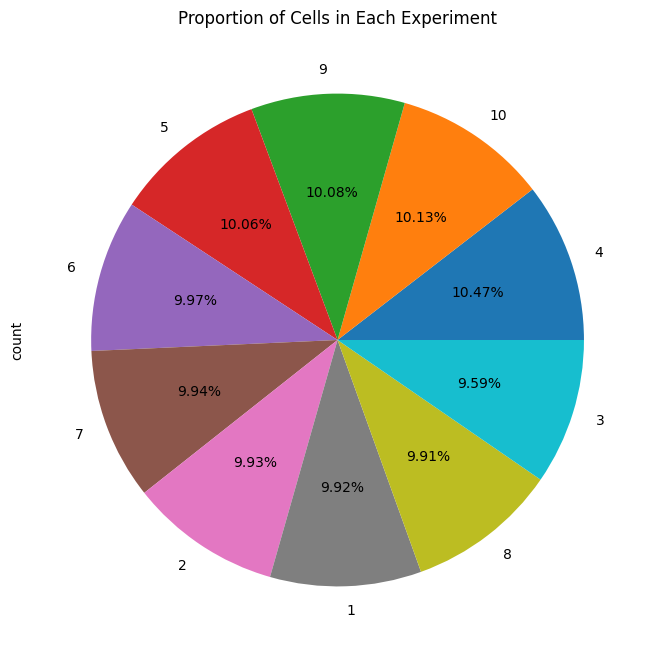

In [ ]:
df['Experiment_ID'].value_counts().plot(kind='pie', figsize=(8, 8), autopct='%1.2f%%', title='Proportion of Cells in Each Experiment')

# figsize means squareplot that is 8 inches by 8 inches.
#. value_counts --> this calculates the count of each unique value.
# %1.2f means display numbers with two decimal places.
# %% is used to display a percentage sign (% is a special character in Python formatting, so %% is needed to escape it).
# Example: If "A" accounts for 50% of the data, it will be displayed as "50.00%".

<Axes: title={'center': 'Cell Positions by Experiment'}, xlabel='X_position_of_cell', ylabel='Y_position_of_cell'>

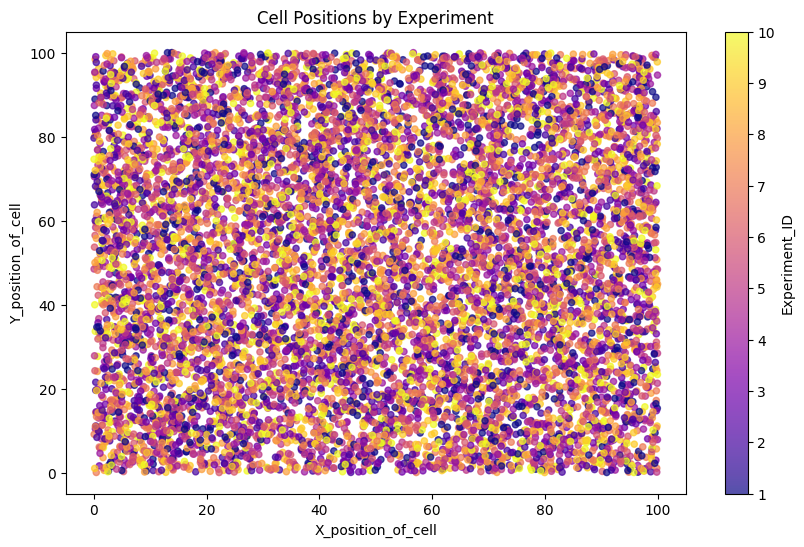

In [ ]:
# In pandas, there is a built-in plotting functionality which internally uses Matplotlib.
# Scatter plots are used when you want to show the relationship between two variables. They are also called correlation and can be created using DataFrame.plot.scatter() function.

# example:
# Scatter plot of cell positions using Pandas' built-in plotting (no Matplotlib)
df.plot.scatter(x='X_position_of_cell', y='Y_position_of_cell',
                c='Experiment_ID', colormap='plasma', alpha=0.7, figsize=(10, 6), title='Cell Positions by Experiment')

# c='Experiment_ID'. #This sets the color of each point based on the "Experiment_ID" column.
# c: this means the values in experiment_id will be shown in colors
# aplha: This sets the transparency of the points.
# 0.7 means the points will be 70% opaque and 30% transparent. reduce overlapping effects if multiple points are plotted on top of each other.
# 'viridis' is a popular color map (a range of colors from yellow to purple)
# (10, 6) means the plot will be 10 inches wide and 6 inches tall.

In [ ]:
help(pd.DataFrame.plot.scatter)

Help on function scatter in module pandas.plotting._core:

scatter(self, x: 'Hashable', y: 'Hashable', s: 'Hashable | Sequence[Hashable] | None' = None, c: 'Hashable | Sequence[Hashable] | None' = None, **kwargs) -> 'PlotAccessor'
    Create a scatter plot with varying marker point size and color.
    
    The coordinates of each point are defined by two dataframe columns and
    filled circles are used to represent each point. This kind of plot is
    useful to see complex correlations between two variables. Points could
    be for instance natural 2D coordinates like longitude and latitude in
    a map or, in general, any pair of metrics that can be plotted against
    each other.
    
    Parameters
    ----------
    x : int or str
        The column name or column position to be used as horizontal
        coordinates for each point.
    y : int or str
        The column name or column position to be used as vertical
        coordinates for each point.
    s : str, scalar or array-

<Axes: title={'center': 'Distribution of X Position of Cells'}, ylabel='Frequency'>

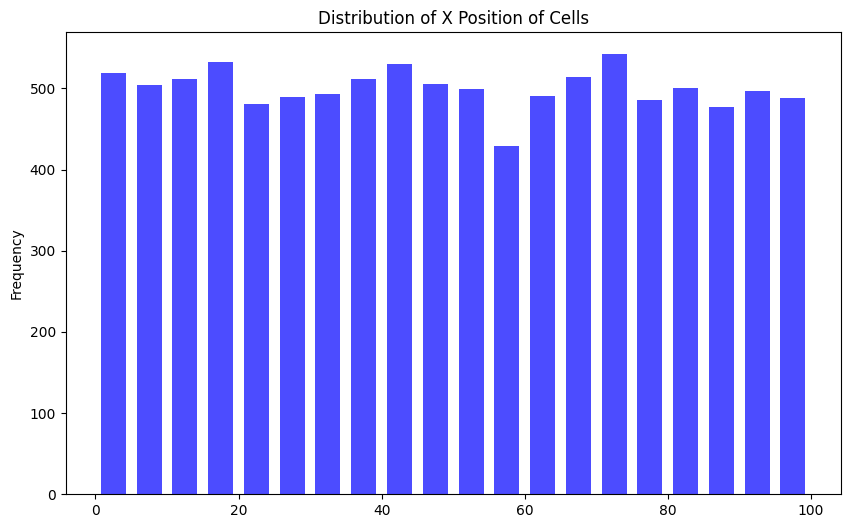

In [ ]:
# Histogram for the distribution of X position without Matplotlib
df['X_position_of_cell'].plot(kind='hist', bins=20, alpha=0.7, rwidth= 0.7, color='blue', figsize=(10, 6), title='Distribution of X Position of Cells')

# The .plot() method is used to create different types of plots directly from the DataFrame.
# kind='hist' specifies that we want to create a histogram.
# bins=20 means the range of X_position_of_cell values will be split into 20 equal intervals.
# alpha=0.7 means that the bars will be 70% opaque and 30% transparent.
# Each bin represents a range of X_position_of_cell values, and the height of the bars shows how many values fall within that range.
# rwidth= 0.7 means that bars will take up 70% of the available space within each bin, leaving some gap between bars.
# figsize=(10, 6) means the plot will have a width of 10 inches and a height of 6 inches.

<Axes: title={'center': 'Distribution of X Position of Cells'}, ylabel='Frequency'>

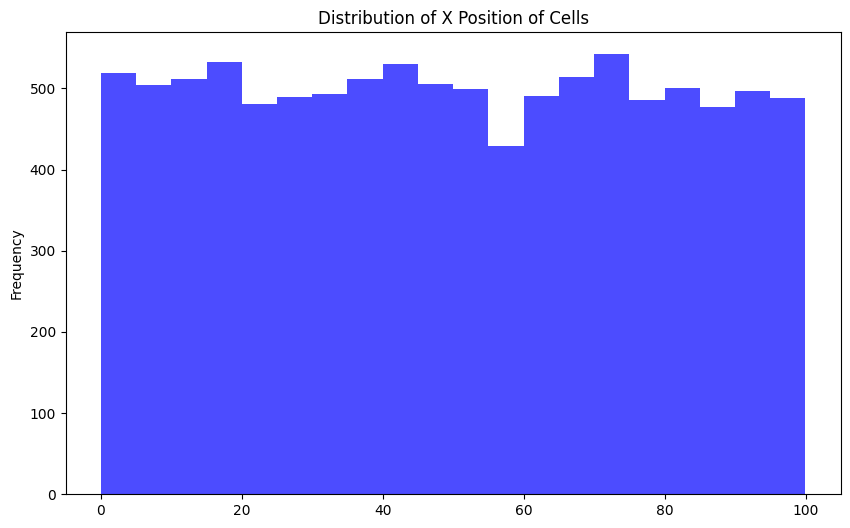

In [ ]:
# Histogram for the distribution of X position without Matplotlib
df['X_position_of_cell'].plot(kind='hist', bins=20, alpha=0.7, color='blue', figsize=(10, 6), title='Distribution of X Position of Cells')

,0
X_position_of_cell,"Axes(0.125,0.11;0.775x0.77)"


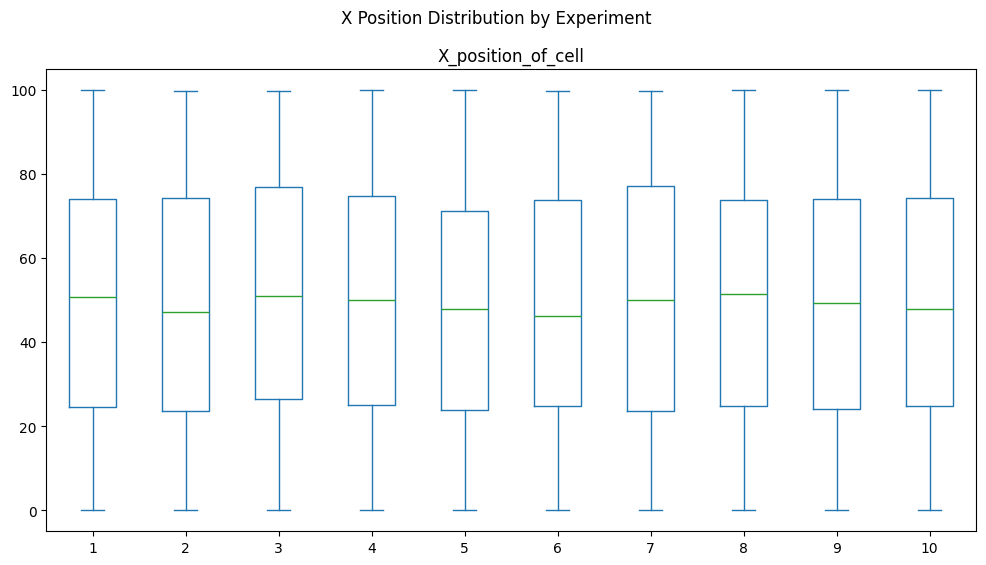

In [ ]:
# A box plot is helpful in understanding the distribution of a variable, its spread, and for identifying outliers.
# It can also show the median, quartiles, and outliers.
# Box plot for X position grouped by Experiment ID without Matplotlib
df.plot(kind='box', column='X_position_of_cell', by='Experiment_ID', figsize=(12, 6), title='X Position Distribution by Experiment')

# a green horizontal line is the whisker.

# Consistency Across Experiments:
# The median values (green lines) are remarkably consistent across all 10 experiments, hovering around 45-50 units
# The spread of data (box size and whisker length) is also quite similar
# This suggests good experimental reproducibility and consistent cell positioning behavior

# Distribution Pattern:
# The boxes are fairly symmetrical around the median
# The full range consistently spans from about 0 to 100 units
# This indicates the X positions of cells are fairly evenly distributed across the available space



# Variability:

# The interquartile ranges (boxes) typically span from about 25 to 75 units
# This shows substantial variation in cell positions, which might be expected if cells are freely moving or randomly distributed

# Outliers:

# Interestingly, there don't appear to be any significant outliers
# All data points fall within the whiskers, suggesting no extreme or unusual cell positions
# This could indicate that there are physical constraints keeping cells within this range, or that the experimental conditions effectively controlled cell positioning

# Experimental Quality:

# The consistency across all 10 experiments suggests:

# Good experimental control
# Reliable methodology
# Reproducible result

In [ ]:
# Calculate the correlation matrix, only including numerical features
correlation_matrix = df.select_dtypes(include=['number']).corr()
print(correlation_matrix)

1


                          ID  Experiment_ID  X_position_of_cell  \
ID                  1.000000      -0.001534            0.009179   
Experiment_ID      -0.001534       1.000000           -0.007760   
X_position_of_cell  0.009179      -0.007760            1.000000   
Y_position_of_cell  0.004198       0.001951            0.008097   
Cell_size          -0.001921      -0.001580            0.001492   

                    Y_position_of_cell  Cell_size  
ID                            0.004198  -0.001921  
Experiment_ID                 0.001951  -0.001580  
X_position_of_cell            0.008097   0.001492  
Y_position_of_cell            1.000000  -0.002091  
Cell_size                    -0.002091   1.000000  


<Axes: >

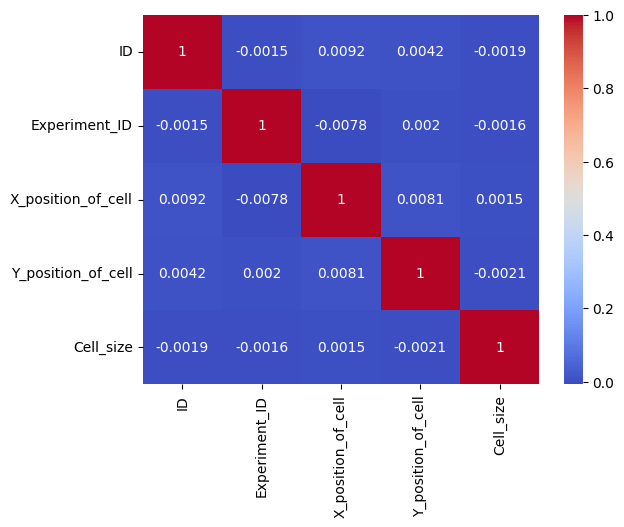

In [ ]:
# visualize the correlation matrix to see how different columns are related.

import seaborn as sns
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')

 Insights


**Correlation values range from -1 (perfect negative correlation) to 1 (perfect positive correlation), with 0 indicating no correlation.
The diagonal is always 1 (red) because it shows each variable's correlation with itself.**

All off-diagonal values are very close to 0 (blue), with values like:

1. -0.0015 between ID and Experiment_ID
2. 0.0092 between ID and X_position
3. 0.0081 between X_position and Y_position
4. -0.0021 between Y_position and Cell_size



**This tells us that:**

All variables are effectively independent of each other.

Cell positions (X and Y) are not influenced by the experiment ID or cell size
Cell size doesn't depend on position.

The experiment number doesn't affect any cell characteristics.

This independence suggests well-controlled experiments where cell characteristics and positions are truly random and not biased by experimental conditions or other factors.

<Axes: title={'center': 'X Position of Cell Over Index'}>

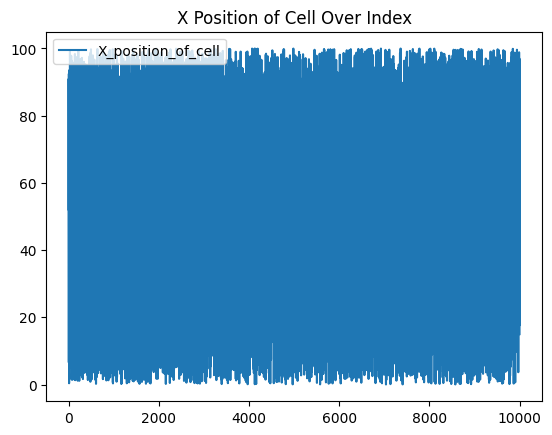

In [ ]:
import pandas as pd

# Load the CSV file into a DataFrame (Assuming it's the same file as before)
file_path = '/content/Cell_Observations.csv'
df = pd.read_csv(file_path)  # Define df here

# Now you can use df for plotting:
df.plot(y='X_position_of_cell', title='X Position of Cell Over Index')

<Axes: >

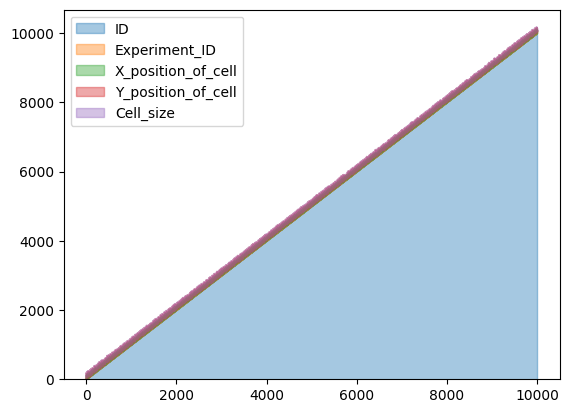

In [ ]:
# Area plot:  It helps see how things change over time.
df.plot.area(alpha=0.4)

<Axes: >

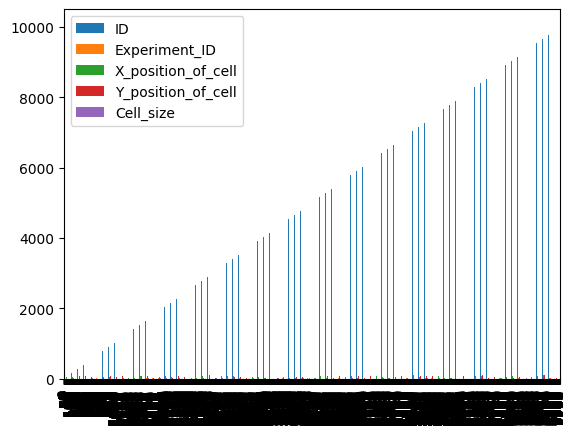

In [ ]:
df.plot.bar()

<Axes: xlabel='X_position_of_cell', ylabel='Y_position_of_cell'>

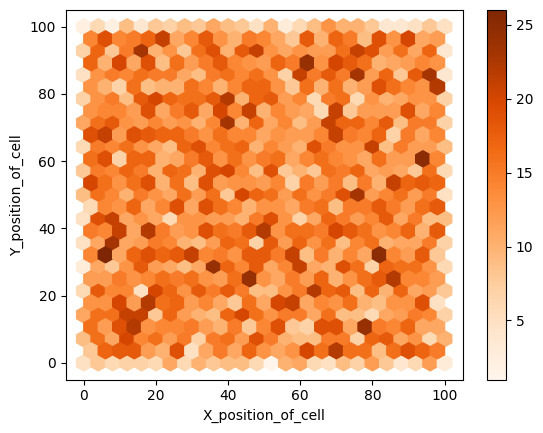

In [ ]:
#  Hexagonal Bins plot.
# Hexagonal binning helps manage dense datasets by using hexagons instead of individual points. It’s useful for visualizing large datasets where points may overlap
df.plot.hexbin(x='X_position_of_cell', y='Y_position_of_cell', gridsize=25, cmap='Oranges')

<Axes: ylabel='Density'>

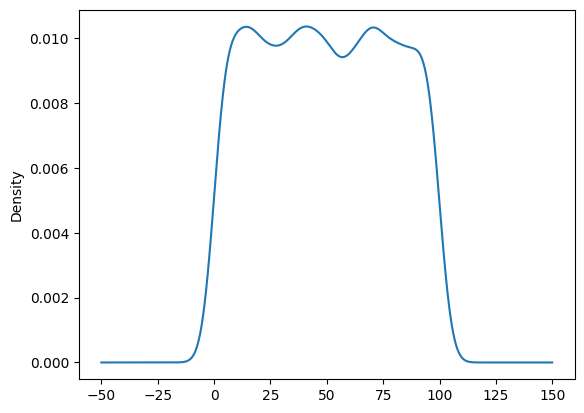

In [ ]:
# KDE (Kernel Density Estimation) creates a smooth curve to show the shape of data by using the df.plot.kde() function. It’s useful for visualizing data patterns and simulating new data based on real examples.

# For example, if you want to plot the KDE of 'X_position_of_cell':
df['X_position_of_cell'].plot.kde()

# Or if you want to plot the KDE of 'Cell_size':
# df['Cell_size'].plot.kde()

# Link for studying: https://towardsdatascience.com/kernel-density-estimation-explained-step-by-step-7cc5b5bc4517

# Links for Studying:

https://www.geeksforgeeks.org/pandas-built-in-data-visualization-ml/